In [79]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import string
import random
import seaborn as sns

# Matching people to their preferred groups

People are given the option to be in different groups which have a fixed size. They rank their preferred groups. 

This algorithm simply sorts them into groups by trying to assign based on the order of their preferences, and finally randomly assigns any leftover people to groups with space.

# Setup a mock dataset of preferences

In [208]:
# Possible groups
group_names = ['Group_%s' % s for s in list(string.ascii_uppercase)] 

# Number of people
N_people = 100

# Number of groups they rank
N_choices = 5

# Assign random perferences to people
people_prefs = {f'Person_{x}': list(np.random.choice(group_names, N_choices, replace=False)) for x in range(N_people)}
# people_prefs = {f'Stud_{x}': list(np.random.choice(group_names, random.randint(0,N_choices), replace=False)) for x in range(N_students)}

assert all(len(x)==N_choices for x in people_prefs.values()), 'not all the people are in people_prefs'

In [210]:
def match_people_to_groups(group_names, people, max_people_per_group=4):
    """
    Sorting people into their preferred groups.
    
    People are given the option to be in different groups which have a fixed size. 
    They rank their preferred groups.

    This algorithm simply sorts them into groups by trying to assign based on the 
    order of their preferences, and finally randomly assigns any leftover people 
    to groups with space.
    
    Args:
        group_names (list): list of names of groups
        people (dict): dict with keys of the names of people, 
                        values their ranked group preferences
        max_people_per_group (int): maximise group size

    Returns:
        group_dict (dict): dict with keys of the group name 
                            and values the people in the group
    
    """
    
    N_people = len(people)
    # Must be enough groups for everyone
    assert len(group_names)*max_people_per_group > N_people,'not enough groups for people'

    group_dict = {group: [] for group in group_names}
    
    i = 0
    while len(people) > 0:                
        for group in group_dict.keys():
            
            # Randomly loop through people
            for s in random.sample(people.keys(), len(people)):
                
                # If a person has no remaining prefences, and there is space in the group, add them
                if len(people[s])==0 and len(group_dict[group]) < max_people_per_group:
                    group_dict[group].append(s)
                    people.pop(s)
                
                # If a person has no remaining prefences, and there is NO space in the group, continue
                elif len(people[s])==0:
                    continue
                
                # Add people to the group if it's their first preference
                elif (people[s][0] == group) and len(group_dict[group]) < max_people_per_group:
                    group_dict[group].append(s)
                    people.pop(s)
                
                # If it's their first preference, but the group is full, remove it from their preferences
                elif (people[s][0]==group):
                    people[s].pop(0)
        i+=1
        print(f'Iteration {i}: {len(people)} people unmatched')

    assert len(set(x for v in group_dict.values() for x in v)) == N_people,'something went wrong'
    
    return group_dict

# Do matching

In [211]:
matched_groups = match_people_to_groups(group_names, copy.deepcopy(people_prefs), max_people_per_group=4)
# matched_groups

Iteration 1: 11 people unmatched
Iteration 2: 7 people unmatched
Iteration 3: 2 people unmatched
Iteration 4: 0 people unmatched


# Which group is everyone in?

In [216]:
person_group_lookup = {person:group_name for group_name,group in matched_groups.items() for person in group}
# person_group_lookup

# What was the original rank of the final assigned group?

I.e. how many people got their first choice?

In [226]:
final_ranks = {p: people_prefs[p].index(person_group_lookup[p]) if person_group_lookup[p] in people_prefs[p] else N_choices+1 for p in people_prefs}
# final_ranks

Text(0, 0.5, 'Number of people')

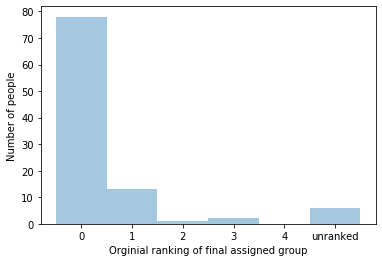

In [228]:
sns.distplot(np.array(list(final_ranks.values()))-0.5, bins=N_choices+1, kde=False)

xticks = list(range(N_choices)) + ['unranked']
plt.xticks(ticks=range(N_choices+1), labels=xticks)
plt.xlabel('Orginial ranking of final assigned group')
plt.ylabel('Number of people')